In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_json = pd.read_json("recipe/full_format_recipes.json")
train = pd.read_csv("recipe/epi_r.csv")

In [4]:
print(train.shape)
train.head

(20052, 680)


<bound method DataFrame.head of                                                    title  rating  calories  \
0                        Lentil, Apple, and Turkey Wrap    2.500     426.0   
1            Boudin Blanc Terrine with Red Onion Confit    4.375     403.0   
2                          Potato and Fennel Soup Hodge    3.750     165.0   
3                       Mahi-Mahi in Tomato Olive Sauce    5.000       NaN   
4                              Spinach Noodle Casserole    3.125     547.0   
5                                         The Best Blts    4.375     948.0   
6      Ham and Spring Vegetable Salad with Shallot Vi...   4.375       NaN   
7                                  Spicy-Sweet Kumquats    3.750       NaN   
8                                 Korean Marinated Beef    4.375     170.0   
9      Ham Persillade with Mustard Potato Salad and M...   3.750     602.0   
10         Yams Braised with Cream, Rosemary and Nutmeg    3.750     256.0   
11                              

In [5]:
print(train.columns)

Index([u'title', u'rating', u'calories', u'protein', u'fat', u'sodium',
       u'#cakeweek', u'#wasteless', u'22-minute meals',
       u'3-ingredient recipes',
       ...
       u'yellow squash', u'yogurt', u'yonkers', u'yuca', u'zucchini',
       u'cookbooks', u'leftovers', u'snack', u'snack week', u'turkey'],
      dtype='object', length=680)


In [6]:
train.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(train.dessert.describe())
print(train.dessert.unique())

count    20052.000000
mean         0.178187
std          0.382679
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dessert, dtype: float64
[ 0.  1.]


In [8]:
print(train.calories.describe())

count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64


In [9]:
train = train.dropna()
#print(train.isnull().sum())

In [10]:
train = train.ix[~((train.calories>10000))]
print(train.calories.describe())

count    15843.000000
mean       489.512719
std        602.875729
min          0.000000
25%        199.000000
50%        332.000000
75%        586.000000
max       9831.000000
Name: calories, dtype: float64


/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


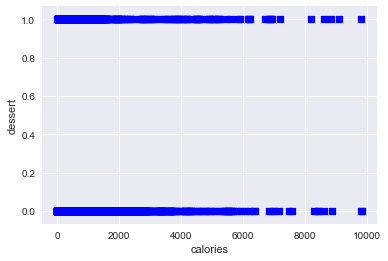

In [11]:
# Plot predictions
plt.scatter(train.calories, train.dessert, c = "blue", marker = "s")
plt.xlabel("calories")
plt.ylabel("dessert")
plt.show()

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


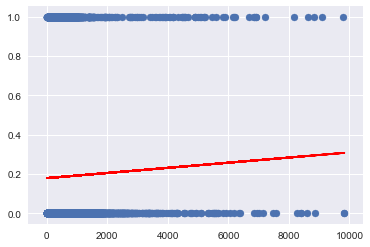

In [13]:
fig, ax = plt.subplots()
fit = np.polyfit(train.calories, train.dessert, deg=1)
ax.plot(train.calories, fit[0] * train.calories + fit[1], color='red')
ax.scatter(train.calories, train.dessert)

fig.show()